# <p style="background-color:green;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>Unsupervised Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

## Tasks

### Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

### Exploratory Data Analysis (EDA)


### K-Means Clustering

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
### Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

### Conclusion

# Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





## Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

You can rename columns to more usable, if you need.

In [2]:
Mall_Customers = pd.read_csv("Mall_Customers.csv")
data = Mall_Customers.copy()
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
65,66,Male,18,48,59
29,30,Female,23,29,87
37,38,Female,30,34,73
151,152,Male,39,78,88
34,35,Female,49,33,14


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Age: Müşterilerin yaşları.


Annual Income (k$): Müşterilerin yıllık gelirleri (binlerce dolar cinsinden).


Gender: Müşterilerin cinsiyeti.


Spending Score (1-100): Müşterilerin harcama puanları (1'den 100'e kadar).

In [4]:
data = data.drop(columns=["CustomerID"])

In [5]:
column_mapping = {
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual income',
    'Spending Score (1-100)': 'spending score'
}

data = data.rename(columns=column_mapping)

In [6]:
def small_info(data):
    # Eksik değerleri göster
    print("Eksik Değerler:")
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print(missing_values)
    print("\n",{'-'*80},"\n")
    print("Toplam Duplicated sütun sayıları :")
    duplicated = data.duplicated().sum()
    print(duplicated)
small_info(data)

Eksik Değerler:
Series([], dtype: int64)

 {'--------------------------------------------------------------------------------'} 

Toplam Duplicated sütun sayıları :
0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
# Veri setinin genel bir profilini elde etmek için
# Gözlem sayısı-veri tipi-null değer sayısı-unique değer sayısı-min-max değerleri
# null değerler "0" gözüküyor!

def summary(data, pred=None):
    obs = data.shape[0]
    Types = data.dtypes
    Counts = data.apply(lambda x: x.count())
    Min = data.min()
    Max = data.max()
    Uniques = data.apply(lambda x: x.unique().shape[0])
    Nulls = data.apply(lambda x: x.isnull().sum())
    print('Data shape:', data.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(data)

Data shape: (200, 4)
___________________________
Data Types:
Types
int64     3
object    1
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
age,int64,200,51,0,18,70
annual income,int64,200,64,0,15,137
gender,object,200,2,0,Female,Male
spending score,int64,200,84,0,1,99


In [9]:
def dataframe_summary(data, columns):  
    
    print("Sütun isimleri:")
    print(data.columns)
    print("\n",{'-'*80},"\n")    
    
    """Prints unique values and their counts for specific columns in the DataFrame."""
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*50}")
        unique_vals = data[column_name].unique()
        value_counts = data[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
        
cat_features = data.select_dtypes(include='object').columns
    
dataframe_summary(data,cat_features)



Sütun isimleri:
Index(['gender', 'age', 'annual income', 'spending score'], dtype='object')

 {'--------------------------------------------------------------------------------'} 

Column: gender
--------------------------------------------------
Unique Values (2): ['Male' 'Female']

Value Counts:
gender
Female    112
Male       88
Name: count, dtype: int64



<Axes: xlabel='gender', ylabel='count'>

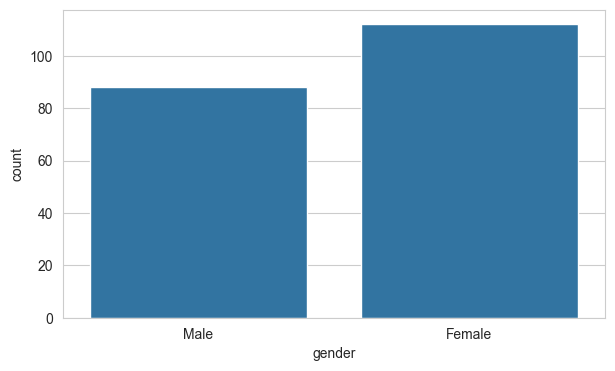

In [10]:
sns.countplot(x='gender',data= data)

In [11]:
numeric_data = data.select_dtypes(include='number')

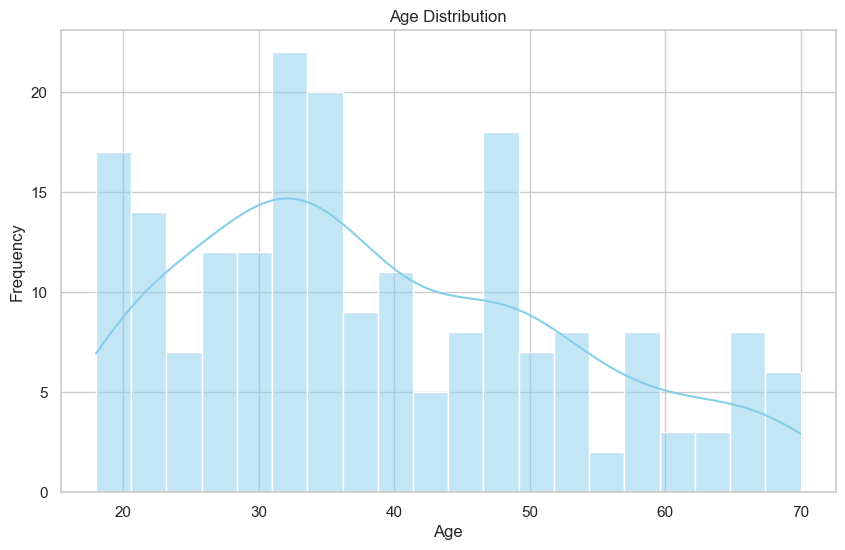

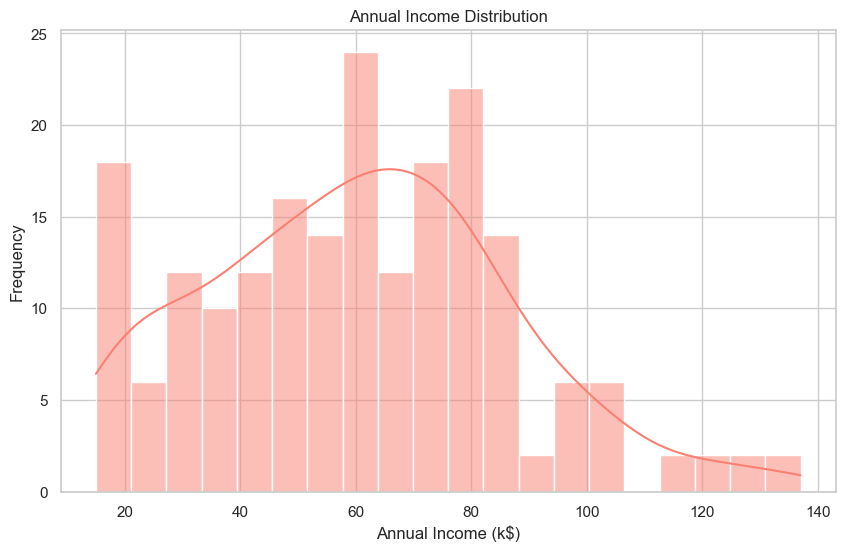

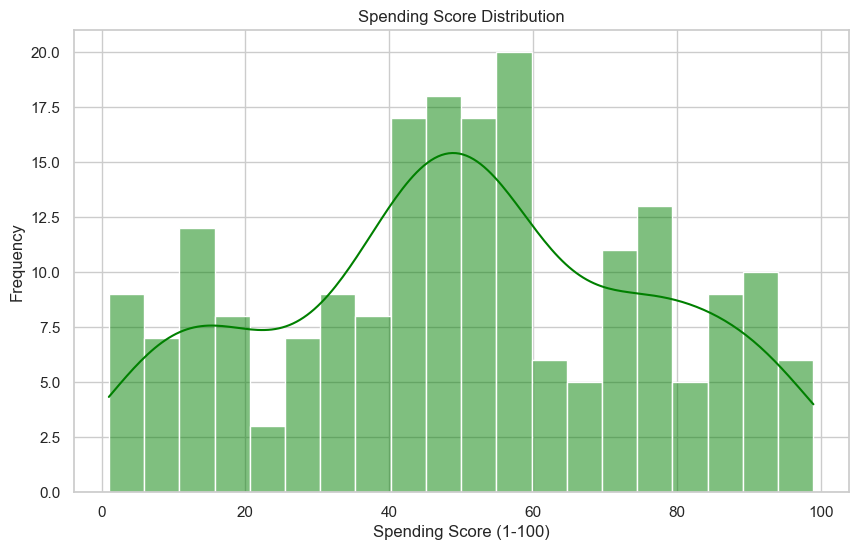

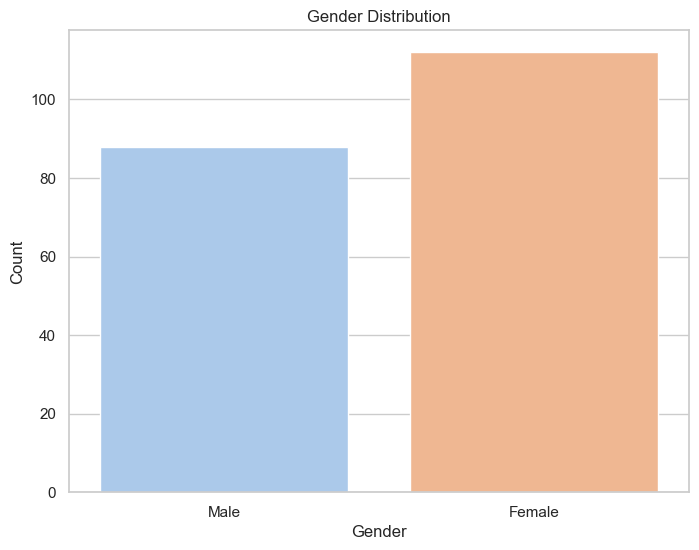

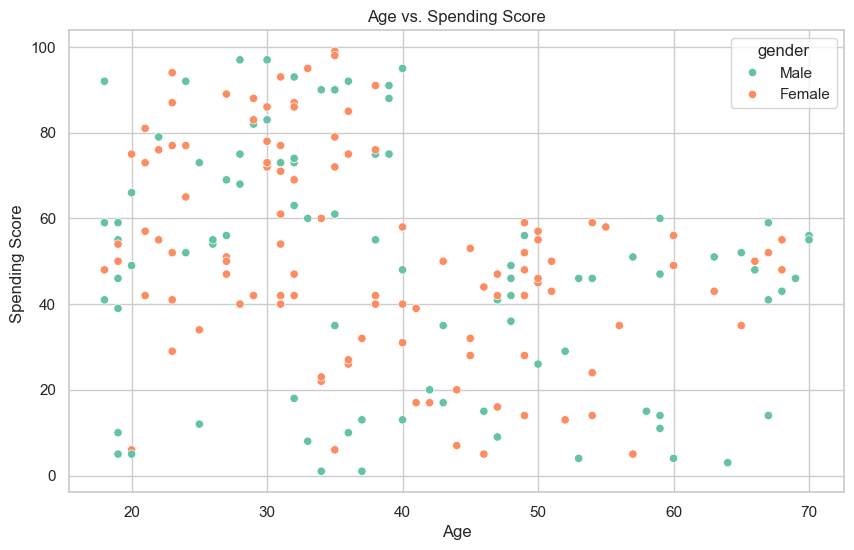

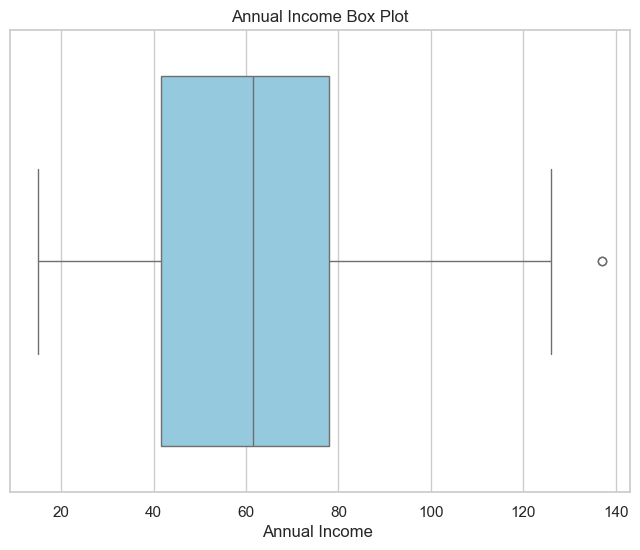

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veri seti sütunlarını görselleştirme
sns.set(style="whitegrid")

# Histogram (age)
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram (annual income)
plt.figure(figsize=(10, 6))
sns.histplot(data['annual income'], bins=20, kde=True, color='salmon')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Histogram (spending score)
plt.figure(figsize=(10, 6))
sns.histplot(data['spending score'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

# Bar plot (gender)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Scatter plot (age vs. spending score)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='spending score', hue='gender', palette='Set2')
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score ')
plt.show()

# Box plot (annual income)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='annual income', color='skyblue')
plt.title('Annual Income Box Plot')
plt.xlabel('Annual Income ')
plt.show()


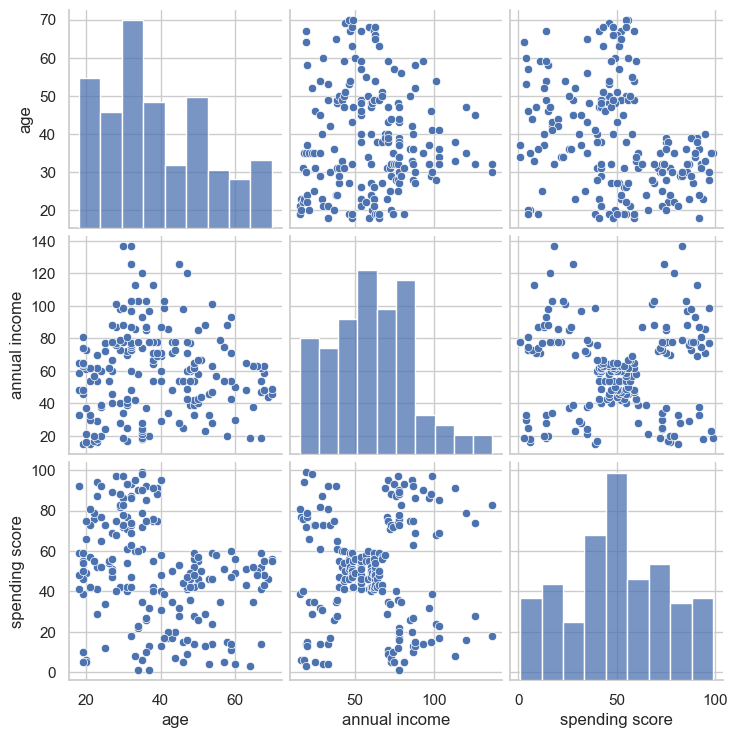

In [13]:
sns.pairplot(data= data)

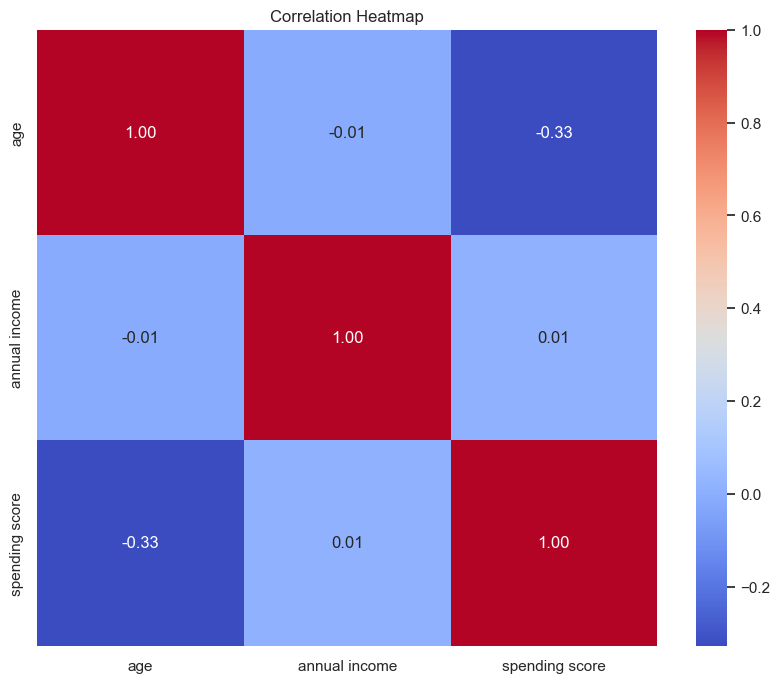

In [14]:
numeric_data = data.select_dtypes(include='number')

# Korelasyon matrisini hesaplama
correlation_matrix = numeric_data.corr()

# Korelasyon ısı haritasını çizme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
multiCorr = data.select_dtypes("number").corr()
def style_correlation_table(correlation_matrix):
    
    multiCorr = correlation_matrix.style.format("{:.2%}") \
    .set_properties(color="#00cc00", **{"background-color": "#00ff00"}) \
    .applymap(lambda v: "font-size:25px; color:green; selector:td:hover, props:[(color, yellow)}" 
              if 0.89 < v < 1 else "background-color:#370073") \
    .set_table_styles([
        {"selector": "td:hover", "props": [("color", "#9c337f"), ("font-size", "23px"), ("font-weight", "bold")]}, 
        {"selector": "th:hover", "props": [("color", "#9c337f"), ("font-weight", "bold")]}
    ])
    
    return multiCorr

# Fonksiyonu kullanarak stillemeyi uygulayıp görselleştirelim
styled_table = style_correlation_table(multiCorr)
styled_table

,age,annual income,spending score
age,100.00%,-1.24%,-32.72%
annual income,-1.24%,100.00%,0.99%
spending score,-32.72%,0.99%,100.00%


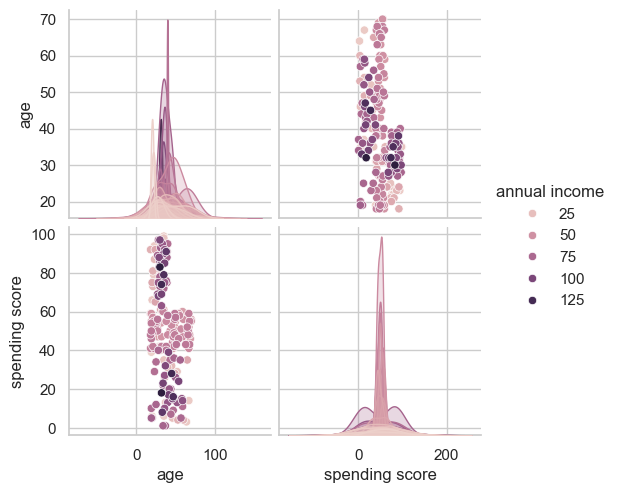

In [16]:
sns.pairplot(data=data, hue="annual income")
plt.show()

In [17]:
data.sample(3)

,gender,age,annual income,spending score
127,Male,40,71,95
94,Female,32,60,42
163,Female,31,81,93


# K-means Clustering

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

Hopkin's İstatistiği, bir veri setindeki rastgele dağılmış noktalar ile gerçek veri noktaları arasındaki ilişkiyi ölçer. 


Eğer Hopkin's İstatistiği değeri 0.5'ten küçükse, veri seti kümelenebilir kabul edilir. 


Değer ne kadar düşükse, veri setinin kümelenebilirliği o kadar iyidir.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pandas as pd

# Kategorik sütunları seçme
categorical_columns = data.select_dtypes("object").columns

# Sayısal sütunları seçme
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Sayısal sütunları ölçeklendirme
        ('cat', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), categorical_columns)  # Kategorik sütunları One-Hot Encoding
    ])

# KMeans modelini oluşturma
KMeans_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', KMeans(n_clusters=8, random_state=42))  # KMeans modeli
])




In [19]:
# Modeli veri setine uygulama
KMeans_model.fit_predict(data) #fit predict  bir arada

array([4, 1, 4, 1, 4, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 4, 1, 7, 1, 4, 1,
       7, 1, 7, 1, 7, 1, 4, 1, 7, 1, 7, 1, 7, 1, 7, 1, 4, 1, 0, 1, 5, 4,
       7, 1, 5, 4, 4, 4, 5, 4, 4, 0, 5, 5, 5, 0, 4, 0, 0, 6, 0, 5, 0, 6,
       5, 0, 6, 4, 0, 5, 0, 0, 0, 6, 5, 5, 6, 5, 0, 5, 0, 5, 6, 5, 5, 6,
       5, 5, 0, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 0, 6, 5, 6, 0, 0, 0, 0,
       0, 6, 5, 6, 6, 6, 0, 5, 5, 5, 6, 5, 5, 2, 6, 2, 3, 2, 3, 2, 3, 2,
       6, 2, 6, 2, 3, 2, 6, 2, 3, 2, 6, 2, 6, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 5, 2, 6, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

**Sonuç**: fit_predict metodu, her veri noktasının ait olduğu kümenin etiketini içeren bir dizi döndürür. Bu etiketler genellikle 0'dan başlayarak "n_clusters-1'"e kadar olan tam sayılardır.

In [20]:
data["Classes"] = KMeans_model.named_steps['classifier'].labels_
data.sample(3)

,gender,age,annual income,spending score,Classes
145,Male,28,77,97,2
181,Female,32,97,86,2
10,Male,67,19,14,7


## Hopkins test

Hopkins testi, bir veri setinin kümeleme eğilimini ölçmek için kullanılan bir istatistiksel testtir. 

Bu test, veri setinin ne kadar iyi kümelemeye uygun olduğunu veya veri setindeki örneklerin ne kadar rastgele dağıldığını belirlemeye yardımcı olur. 

K-Means gibi kümeleme algoritmaları öncesinde veri setinin bu analizini yapmak, algoritmanın etkinliğini değerlendirmek için önemlidir. 


Hopkins istatistiği, 0 ile 1 arasında bir değer alır.

0.5 in altı kabul edileblir olup 0.3 den az olması istenen bir durumdur

In [21]:
data = data.drop("Classes", axis =1)   # yukarda tahmin edilen degerleri tekrar devre dışı bıraktık

In [22]:
data.sample(3)

,gender,age,annual income,spending score
0,Male,19,15,39
95,Male,24,60,52
110,Male,65,63,52


In [23]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [24]:
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    
    # Kategorik sütunları One-Hot Encoding ile dönüştürme
    data_frame = pd.get_dummies(data_frame)
    
    # Örnekleme: n gözlem al
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    
    # Dataframe'deki en yakın komşularına olan mesafeyi al
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    
    # Rastgele olarak, D'nin varyansı kadar gözlem seç ve bunların en yakın komşularına olan mesafeyi al
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values = np.random.uniform(low=min_data_frame, high=max_data_frame, size=(sampling_size, data_frame.shape[1]))
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_values)
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    
    # Hopkins skorunu hesapla
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [25]:
hopkins(data, data.shape[0])

0.32969577410582385

In [26]:
hopkins(data, 50) # 100 adet gözlem için baktım skorlar yakın. Her çalışmada değişir ama çok büyük fark çıkmaz

0.2895774365156025

NOT: 0.30 un altında olması ORTA bir kümeleme olabileceğini söylüyor

# Choosing The Optimal Number of Clusters

In [27]:
from sklearn.cluster import KMeans
import pandas as pd

# Kategorik sütunları One-Hot Encoding ile dönüştürme
data_encoded = pd.get_dummies(data)

# SSD değerlerini depolamak için boş bir liste oluşturma
ssd = []

K = range(2, 10)  # Minimum 2 küme ile başlayın

for k in K:
    # Her bir farklı küme sayısı için KMeans modelini oluşturur ve eğitir.
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_encoded)
    ssd.append(model.inertia_)


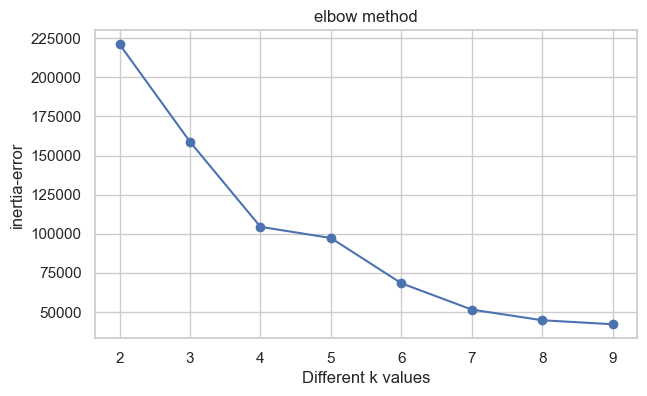

In [28]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

Burada ilk keskin düşüşün 4 te olduğu görülüyor.

In [29]:
ssd   # yukarsda hesaplanmıştı..  sum of sqaured distance

[221185.68749999997,
 158843.47192312015,
 104463.19922884135,
 97309.11432057478,
 68373.70057963196,
 51545.36004489688,
 44734.44301948052,
 42176.29238134237]

In [30]:
pd.Series(ssd).diff()

# ilk satır 0 çünkü "221185 - hiçbirşey"
# en büyük düşüşü arıyoruz

0             NaN
1   -62342.215577
2   -54380.272694
3    -7154.084908
4   -28935.413741
5   -16828.340535
6    -6810.917025
7    -2558.150638
dtype: float64

In [31]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,62342.215577
3,54380.272694
4,7154.084908
5,28935.413741
6,16828.340535
7,6810.917025
8,2558.150638


In [32]:
df_diff

,0
1,NaN
2,62342.215577
3,54380.272694
4,7154.084908
5,28935.413741
6,16828.340535
7,6810.917025
8,2558.150638


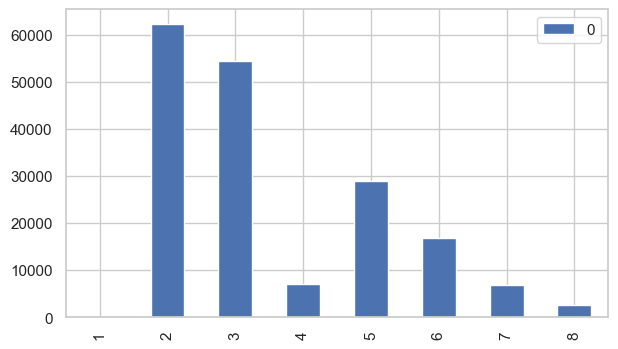

In [33]:
df_diff.plot(kind='bar'); # alttaki grafiğe göre en sert düşüş noktasını görelim

NOT: en sert düşüşün 4 de olduğu görülüyor. Fakat yellowbrik üzerinden de bunu teyit etmeye çalışacağız..


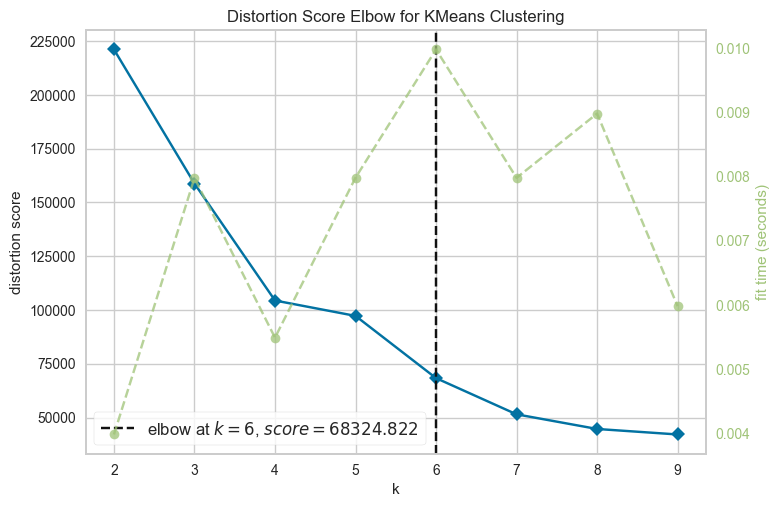

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pandas as pd

# Kategorik sütunları seçme
categorical_columns = data.select_dtypes("object").columns

# Sayısal sütunları seçme
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Kategorik sütunları dönüştürme
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Sayısal sütunları ölçeklendirme
        ('cat', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), categorical_columns)  # Kategorik sütunları One-Hot Encoding
    ])

# KMeans modelini oluşturma
KMeans_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', KMeans(random_state=42))  # KMeans modeli
])

visualizer = KElbowVisualizer(KMeans_model['classifier'], k=(2, 10))  # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.

visualizer.fit(data)  # Veriyi modelin fit metoduna veriyoruz
visualizer.show()  # Elbow yöntemini görselleştiriyoruz


yeşil çizgi fit time

siyah çizgi optimal küme sayısının bulunduğu noktayı vurgular.

## Silhouette analysis


Silhouette değeri -1 ile 1 arasında değişir:

1: i veri noktası kendi kümesinde iyi yerleştirilmiş ve diğer kümelerden uzakta demektir.

0: i veri noktası iki küme arasında bir sınıra yakın demektir.

−1: i veri noktası yanlış bir kümeye atanmış demektir.

bu değerlerin "eşik" değerleri kesin bir şekilde belirlenmemiştir. Ancak, pratikte, ortalama silhouette değerinin yüksek olması (genellikle 0.5'ten büyük) kümelenmenin iyi olduğunu gösterirken, düşük değerler (genellikle 0.25'ten düşük) kümelenmenin iyi olmadığını veya daha iyi yapılabileceğini gösterebilir.

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score


In [36]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3318732932946229
For n_clusters=3, the silhouette score is 0.33545193002465656
For n_clusters=4, the silhouette score is 0.4052954330641215
For n_clusters=5, the silhouette score is 0.3574050351346702
For n_clusters=6, the silhouette score is 0.41532495778518114
For n_clusters=7, the silhouette score is 0.44172063782131477
For n_clusters=8, the silhouette score is 0.43249096868827536


## Interim Evaluation

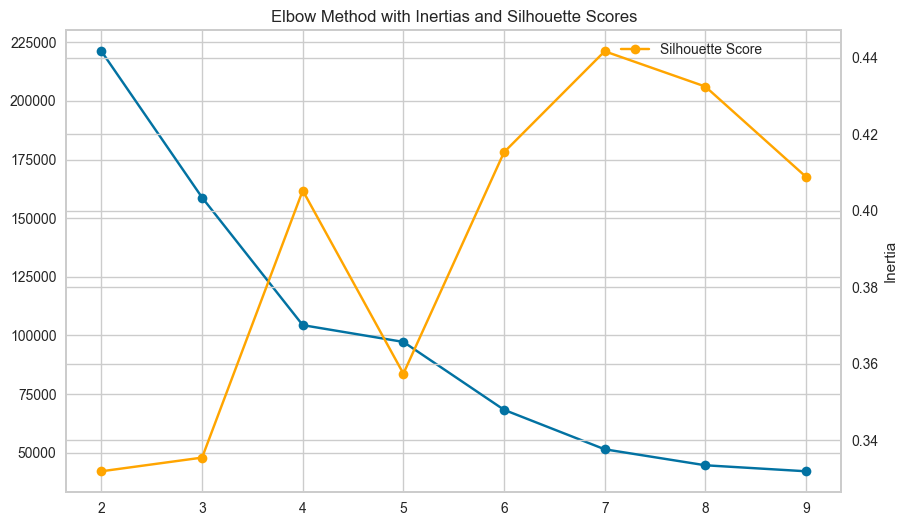

In [37]:
# Elbow ve Silhouette skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(data)
    silhouette = silhouette_score(data, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)

# Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))

# Inertias'ı çizme
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

# İkincil y-eksenine Silhouette Skorlarını çizme
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

# Eksen etiketleri, başlık ve açıklamaları ekleme
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()


## Silhouette Visualizer

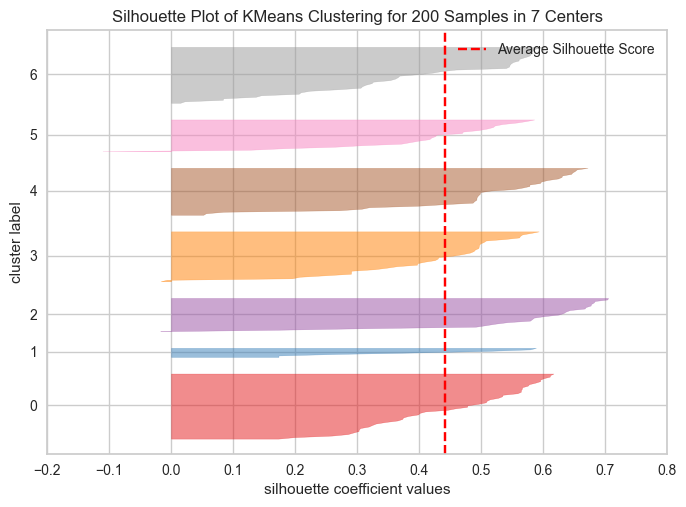

In [38]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model7 = KMeans(n_clusters=7, random_state=42)  # kmeans = 7 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model7)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof();

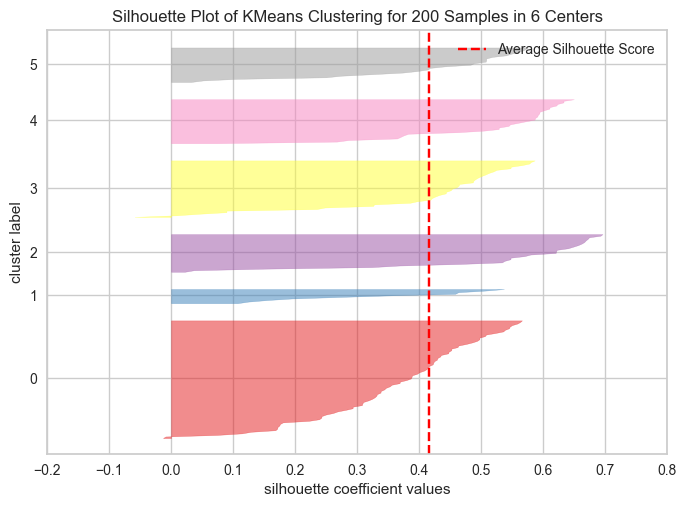

In [39]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model6 = KMeans(n_clusters=6, random_state=42)  # kmeans = 6 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model6)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof();

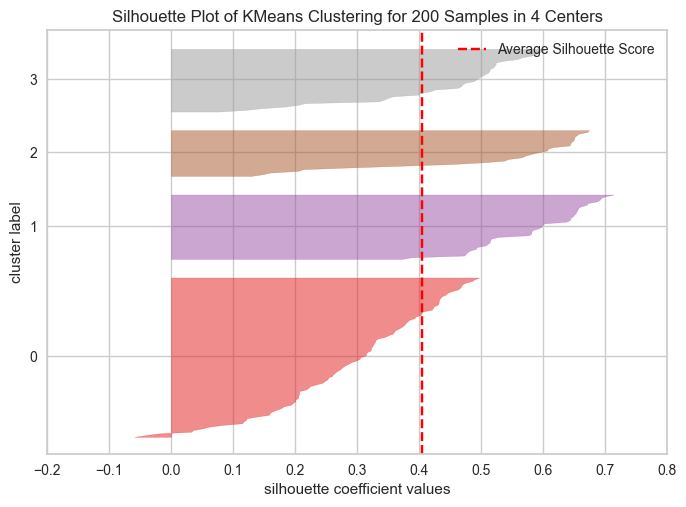

In [40]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)  # kmeans = 4 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.poof();

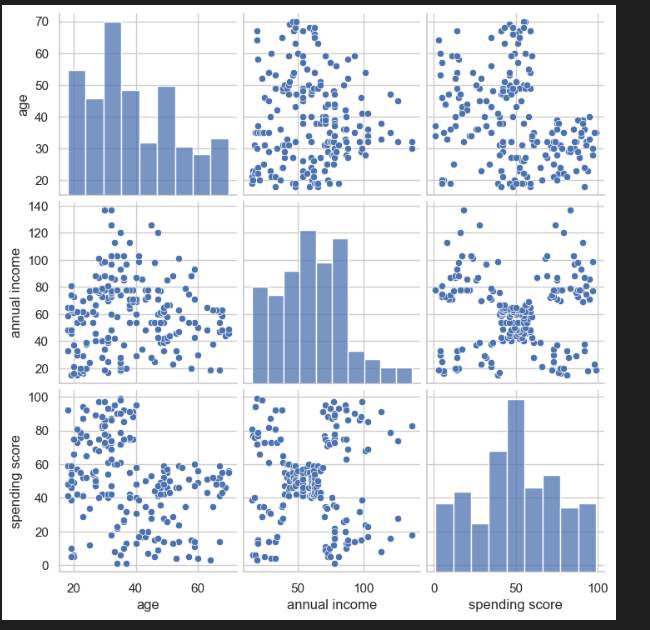

skorlar çok iyi değil pairplot da görüldüğü gibi ayrışımlar çok iyi  olmadığı anlamına geliyor


elbow da çıkan küme sayısınını (burada 6) 

silhouette skoruna .(For n_clusters=7, the silhouette score is 0.44172063782131477) burada 0.44 çıkmış. 

EĞER bu değer (n_clusters=7 değeri 0.44172063782131477 ) 0.50 den büyük olsaydı o zaman elbow daki Inertia değerini alacaktık.. 

İLK grafikde n_clusters = 4, elbow 6 demişken yellowbrick 7 demişti..hangisini alcağız?



## OneHotEncoder

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pandas as pd

# Kategorik sütunları seçme
categorical_columns = data.select_dtypes("object").columns

# Sayısal sütunları seçme
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Sayısal sütunları ölçeklendirme
        ('cat', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), categorical_columns)  # Kategorik sütunları One-Hot Encoding
    ])

# KMeans modelini oluşturma
KMeans_Final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', KMeans(n_clusters=4, random_state=42))  # KMeans modeli
])




In [42]:
KMeans_Final_model.fit_predict(data) #fit predict  bir arada

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [43]:
KMeans_Final_model['classifier'].labels_


array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [44]:
clusters = KMeans_Final_model['classifier'].labels_

In [45]:
data.sample(1)

,gender,age,annual income,spending score
110,1,65,63,52


In [46]:
data["predicted_clusters"] = clusters

In [47]:
data.sample(5) # burada predicted olan feature içinde tahmin sonuçları görülüyor |predicted_clusters|

,gender,age,annual income,spending score,predicted_clusters
74,1,59,54,47,0
168,0,36,87,27,3
174,0,52,88,13,3
89,0,50,58,46,0
27,1,35,28,61,2


In [48]:
# orjinal data setini çağıralım

Mall_Customers.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
161,162,Female,29,79,83
158,159,Male,34,78,1
30,31,Male,60,30,4


In [49]:
Mall_Customers["predicted_clusters"] = clusters


In [50]:
Mall_Customers.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_clusters
107,108,Male,54,63,46,0
64,65,Male,63,48,51,0
174,175,Female,52,88,13,3
79,80,Female,49,54,42,0
95,96,Male,24,60,52,2


In [51]:
ct = pd.crosstab(Mall_Customers.predicted_clusters, Mall_Customers["Spending Score (1-100)"]) # ayrılan class'lara göre tahmin ve labels karşılaştırıyor.
ct

Spending Score (1-100),1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,26,27,28,29,31,32,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,65,66,68,69,71,72,73,74,75,76,77,78,79,81,82,83,85,86,87,88,89,90,91,92,93,94,95,97,98,99
predicted_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,2,1,1,0,0,0,0,1,0,1,3,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,2,1,0,1,2,3,3,1,1,5,2,4,2,3,2,3,1,0,3,3,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2,1,1,2,2,4,1,1,1,1,0,0,2,1,2,1,3,1,2,2,1,2,0,2,2,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,2,4,0,0,0,1,2,1,1,2,1,2,0,3,4,1,1,0,2,2,2,0,1,1,0,0,0,1,4,0,1,1,2,0,1,2,1,0,0,0,1,0,0,0,0,2,0,1,0,0,1,1
3,2,0,0,3,0,1,1,1,2,0,1,2,1,2,2,2,1,2,1,1,1,1,1,1,1,0,1,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
ct_2 = pd.crosstab(Mall_Customers.predicted_clusters, Mall_Customers["Annual Income (k$)"]) # ayrılan class'lara göre tahmin ve labels karşılaştırıyor.
ct_2

Annual Income (k$),15,16,17,18,19,20,21,23,24,25,28,29,30,33,34,37,38,39,40,42,43,44,46,47,48,49,50,54,57,58,59,60,61,62,63,64,65,67,69,70,71,72,73,74,75,76,77,78,79,81,85,86,87,88,93,97,98,99,101,103,113,120,126,137
predicted_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,2,2,0,1,0,1,2,1,1,2,1,1,1,2,1,1,3,2,2,2,3,2,2,8,1,1,1,3,1,3,5,0,2,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,1,2,1,1,1,2,6,1,1,1,1,3,2,1,1,1,1,1,2,1,1,1,1
2,2,2,2,1,2,2,2,1,2,1,2,1,1,2,1,1,1,2,3,1,1,0,2,0,3,0,0,4,1,1,1,3,1,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,2,1,2,1,1,1,2,6,0,1,1,1,3,2,1,1,1,1,1,2,1,1,1,1


In [53]:
data.sample(1)

,gender,age,annual income,spending score,predicted_clusters
81,1,38,54,55,2


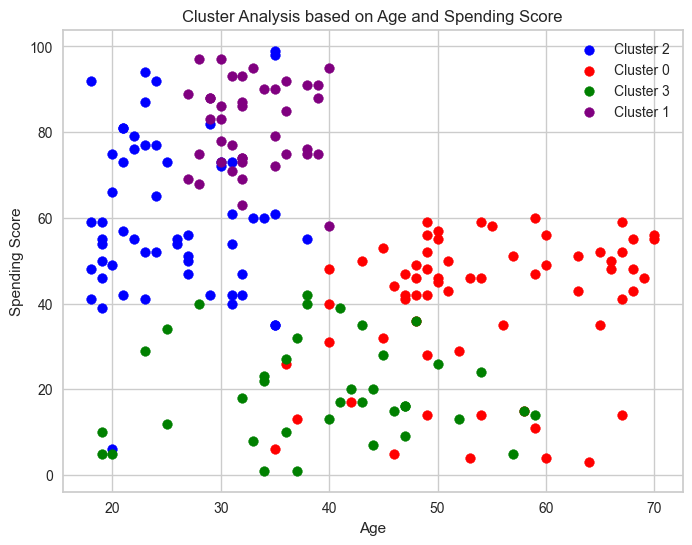

In [54]:
# Benzersiz küme numaralarını alın
unique_clusters = data["predicted_clusters"].unique()

# Renklerin belirlenmesi
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan']

# Renklerle ilgili bir sözlük oluşturun
color_dict = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Scatter plot'u oluşturun ve her küme için farklı renkleri kullanın
plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    cluster_data = data[data["predicted_clusters"] == cluster]
    plt.scatter(cluster_data["age"], cluster_data["spending score"], c=color_dict[cluster], label=f'Cluster {cluster}')

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Cluster Analysis based on Age and Spending Score")
plt.legend()
plt.show()


## LabelEncoder()

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Kategorik sütunları seçme
categorical_columns = data.select_dtypes("object").columns

# Sayısal sütunları seçme
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Sayısal sütunları ölçeklendirme
        ('cat', LabelEncoder(), categorical_columns)  # Kategorik sütunları Label Encoding
    ])

# KMeans modelini oluşturma
KMeans_Final_model_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier_2', KMeans(n_clusters=4, random_state=42))  # KMeans modeli
])




In [59]:
KMeans_Final_model_2.fit_predict(data) #fit predict  bir arada

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [60]:
KMeans_Final_model_2['classifier_2'].labels_


array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [61]:
clusters_2 = KMeans_Final_model_2['classifier_2'].labels_
data.sample(3)


,gender,age,annual income,spending score,predicted_clusters
169,1,32,87,63,1
115,0,19,65,50,2
110,1,65,63,52,0


In [62]:
data["predicted_clusters_2"] = clusters_2

In [63]:
data.sample(5) # burada predicted olan feature içinde tahmin sonuçları görülüyor |predicted_clusters|


,gender,age,annual income,spending score,predicted_clusters,predicted_clusters_2
14,1,37,20,13,0,0
137,1,32,73,73,1,1
95,1,24,60,52,2,2
11,0,35,19,99,2,2
61,1,19,46,55,2,2


In [64]:
Mall_Customers.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_clusters
114,115,Female,18,65,48,2
121,122,Female,38,67,40,3
162,163,Male,19,81,5,3


In [65]:
Mall_Customers["predicted_clusters_2"] = clusters_2

In [66]:
Mall_Customers.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_clusters,predicted_clusters_2
116,117,Female,63,65,43,0,0
72,73,Female,60,50,49,0,0
2,3,Female,20,16,6,2,2
74,75,Male,59,54,47,0,0
21,22,Male,25,24,73,2,2


In [67]:
ct = pd.crosstab(Mall_Customers.predicted_clusters, Mall_Customers["Spending Score (1-100)"]) # ayrılan class'lara göre tahmin ve labels karşılaştırıyor.
ct

Spending Score (1-100),1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,22,23,24,26,27,28,29,31,32,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,65,66,68,69,71,72,73,74,75,76,77,78,79,81,82,83,85,86,87,88,89,90,91,92,93,94,95,97,98,99
predicted_clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,2,1,1,0,0,0,0,1,0,1,3,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,2,1,0,1,2,3,3,1,1,5,2,4,2,3,2,3,1,0,3,3,1,1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,2,1,1,2,2,4,1,1,1,1,0,0,2,1,2,1,3,1,2,2,1,2,0,2,2,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,2,4,0,0,0,1,2,1,1,2,1,2,0,3,4,1,1,0,2,2,2,0,1,1,0,0,0,1,4,0,1,1,2,0,1,2,1,0,0,0,1,0,0,0,0,2,0,1,0,0,1,1
3,2,0,0,3,0,1,1,1,2,0,1,2,1,2,2,2,1,2,1,1,1,1,1,1,1,0,1,1,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


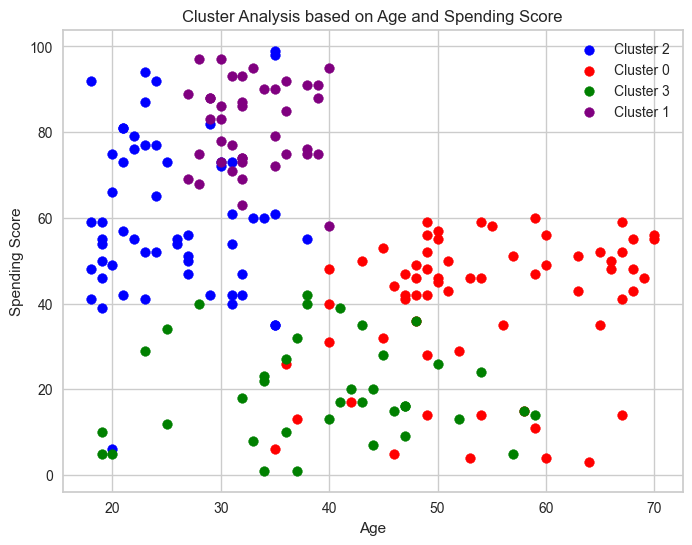

In [68]:
# Benzersiz küme numaralarını alın
unique_clusters = data["predicted_clusters_2"].unique()

# Renklerin belirlenmesi
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan']

# Renklerle ilgili bir sözlük oluşturun
color_dict = {cluster: color for cluster, color in zip(unique_clusters, colors)}

# Scatter plot'u oluşturun ve her küme için farklı renkleri kullanın
plt.figure(figsize=(8, 6))
for cluster in unique_clusters:
    cluster_data = data[data["predicted_clusters_2"] == cluster]
    plt.scatter(cluster_data["age"], cluster_data["spending score"], c=color_dict[cluster], label=f'Cluster {cluster}')

plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Cluster Analysis based on Age and Spending Score")
plt.legend()
plt.show()


In [80]:
data.sample(1)

,gender,age,annual income,spending score,predicted_clusters,predicted_clusters_2
66,0,43,48,50,0,0


## Clustering based on Age and Spending Score - X1

### *i. Create a new dataset with two variables of your choice*

In [69]:
X1 = data[['age', 'spending score']]
X1.sample(3)


,age,spending score
25,29,82
4,31,40
157,30,78


### *ii. Determine optimal number of clusters*


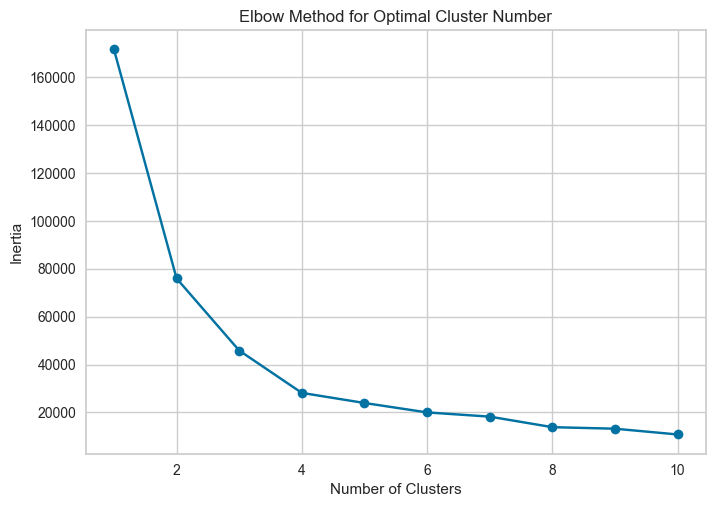

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow methodu için farklı küme sayıları aralığı
k_range = range(1, 11)
inertia = []

# Farklı küme sayıları için KMeans uygulayarak toplam kare hatasını hesaplayın
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

# Elbow methodunu görselleştirme
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Burada 3 veya 4 alınabilir

In [71]:
inertia  # yukarsda hesaplanmıştı..  sum of sqaured distance


[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23951.044340905453,
 20015.97945860015,
 18257.478685045746,
 13855.829804868808,
 13216.221407166293,
 10808.438587626972]

In [72]:
pd.Series(inertia).diff()

# ilk satır 0 çünkü "221185 - hiçbirşey"
# en büyük düşüşü arıyoruz

0             NaN
1   -95586.343990
2   -30108.479394
3   -17675.093049
4    -4214.539226
5    -3935.064882
6    -1758.500774
7    -4401.648880
8     -639.608398
9    -2407.782820
dtype: float64

In [73]:
df_diff =pd.DataFrame(-pd.Series(inertia).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,95586.343990
3,30108.479394
4,17675.093049
5,4214.539226
6,3935.064882
7,1758.500774
8,4401.648880
9,639.608398
10,2407.782820


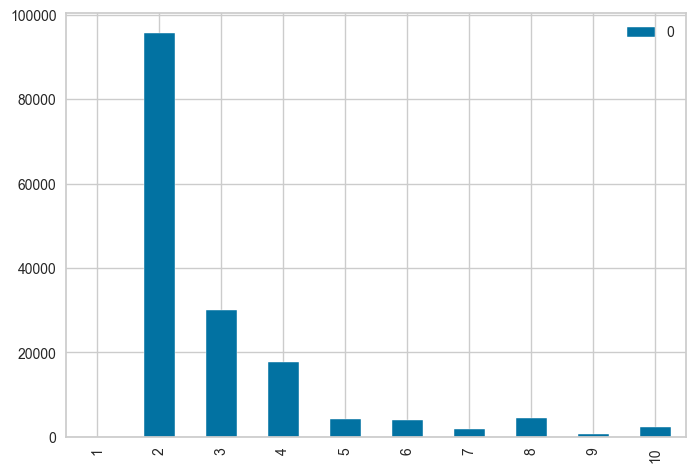

In [74]:
df_diff.plot(kind='bar'); # alttaki grafiğe göre en sert düşüş noktasını görelim


NOT: en sert düşüşün 3 de olduğu görülüyor. Fakat yellowbrik üzerinden de bunu teyit etmeye çalışacağız..

### *iii. Apply K Means*
### *iv. Visualizing and Labeling All the Clusters*
## Clustering based on Annual Income and Spending Score - X2

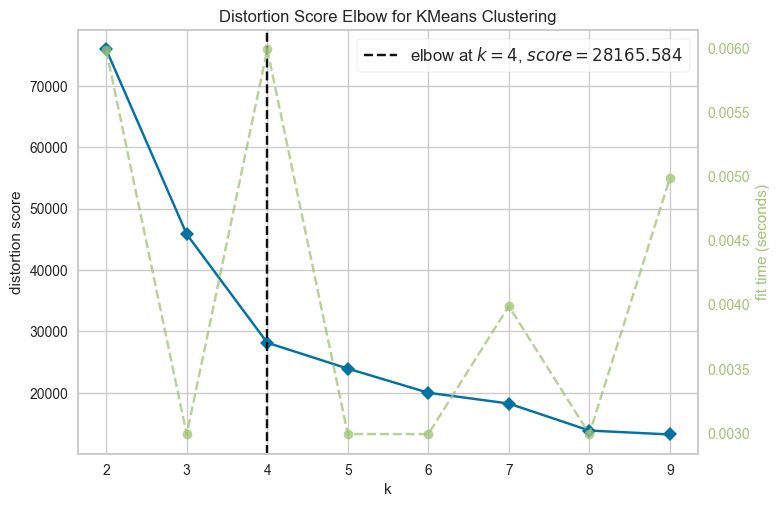

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pandas as pd

# Kategorik sütunları seçme
categorical_columns = X1.select_dtypes("object").columns

# Sayısal sütunları seçme
numerical_columns = X1.select_dtypes(include=['int64', 'float64']).columns

# Kategorik sütunları dönüştürme
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X1[column] = le.fit_transform(X1[column])
    label_encoders[column] = le

# Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Sayısal sütunları ölçeklendirme
        ('cat', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), categorical_columns)  # Kategorik sütunları One-Hot Encoding
    ])

# KMeans modelini oluşturma
KMeans_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', KMeans(random_state=42))  # KMeans modeli
])

visualizer = KElbowVisualizer(KMeans_model['classifier'], k=(2, 10))  # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.

visualizer.fit(X1)  # Veriyi modelin fit metoduna veriyoruz
visualizer.show()  # Elbow yöntemini görselleştiriyoruz


yellowbrik kütüphanesi n_clusters = 4 olduğunu görebiliriz

In [76]:
from sklearn.metrics import silhouette_score

In [77]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44774691157513774
For n_clusters=6, the silhouette score is 0.4044195972499981
For n_clusters=7, the silhouette score is 0.3930185883365383
For n_clusters=8, the silhouette score is 0.39806486273762287


n_clusters=4, the silhouette score is 0.499 olduğu görünüyor .5 e en yakın score n_clusters=4 de

n_clusters in scoru .5 in üzerinde olması iyi olarak değerlendirilir

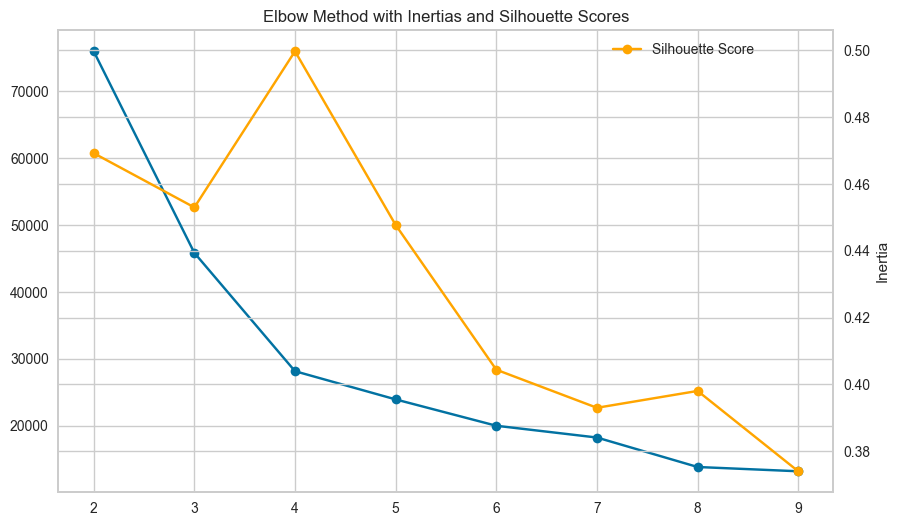

In [78]:
# Elbow ve Silhouette skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42)
    labels = model.fit_predict(X1)
    silhouette = silhouette_score(X1, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)

# Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))

# Inertias'ı çizme
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')

# İkincil y-eksenine Silhouette Skorlarını çizme
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')

# Eksen etiketleri, başlık ve açıklamaları ekleme
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

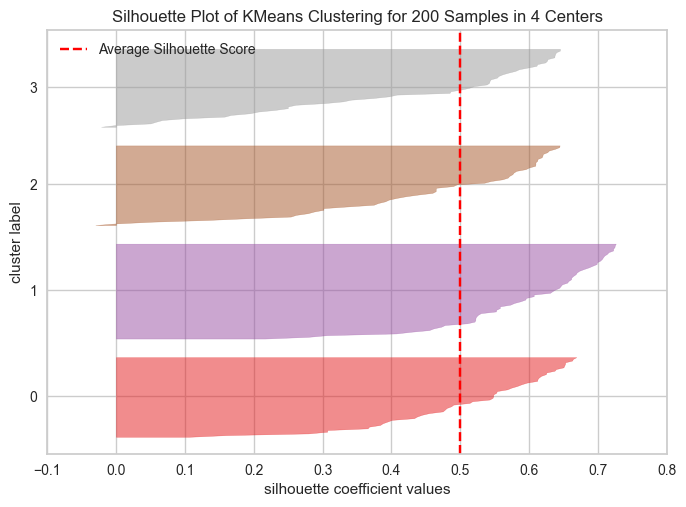

In [79]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

X1_model4 = KMeans(n_clusters=4, random_state=42)  # kmeans = 4 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(X1_model4)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

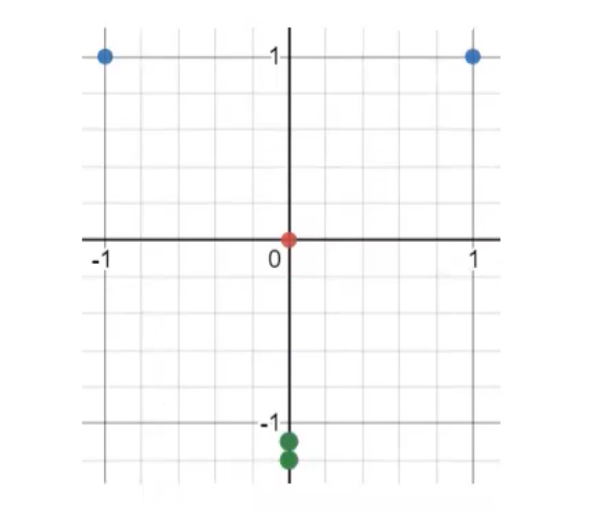

__Silhouette Score-->__ (1-√2) / √2 = -0.29

In [81]:
data.sample(1)

,gender,age,annual income,spending score,predicted_clusters,predicted_clusters_2
152,0,44,78,20,3,3


### *i. Create a new dataset with two variables of your choice*

In [83]:
X2 = data[['gender', 'annual income']]

In [84]:
X2.sample(3)

,gender,annual income
33,1,33
30,1,30
119,0,67


### *ii. Determine optimal number of clusters*

### *iv. Visualizing and Labeling All the Clusters*

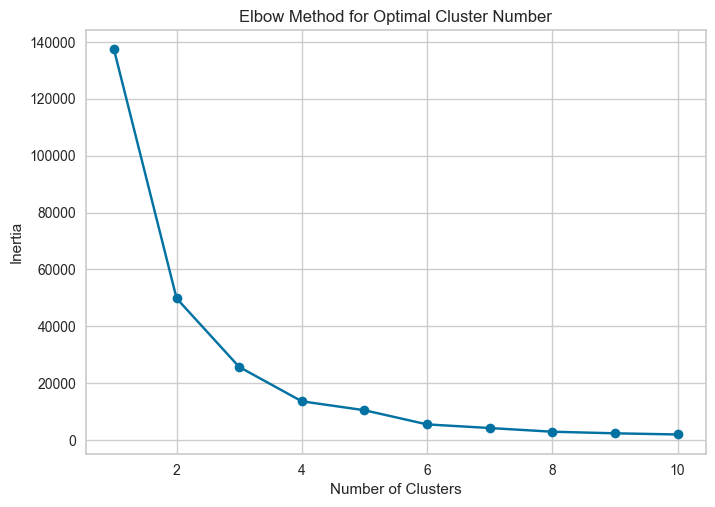

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow methodu için farklı küme sayıları aralığı
k_range = range(1, 11)
inertia = []

# Farklı küme sayıları için KMeans uygulayarak toplam kare hatasını hesaplayın
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

# Elbow methodunu görselleştirme
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [87]:
inertia  # yukarsda hesaplanmıştı..  sum of sqaured distance


[137326.56,
 49810.983766233774,
 25689.409053156145,
 13605.98178210678,
 10473.724206349205,
 5492.184312169311,
 4216.843365330322,
 2918.8224206349205,
 2356.7256562881557,
 1950.167622655123]

In [88]:
pd.Series(inertia).diff()

# ilk satır 0 çünkü "221185 - hiçbirşey"
# en büyük düşüşü arıyoruz

0             NaN
1   -87515.576234
2   -24121.574713
3   -12083.427271
4    -3132.257576
5    -4981.539894
6    -1275.340947
7    -1298.020945
8     -562.096764
9     -406.558034
dtype: float64

In [89]:
df_diff =pd.DataFrame(-pd.Series(inertia).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,87515.576234
3,24121.574713
4,12083.427271
5,3132.257576
6,4981.539894
7,1275.340947
8,1298.020945
9,562.096764
10,406.558034


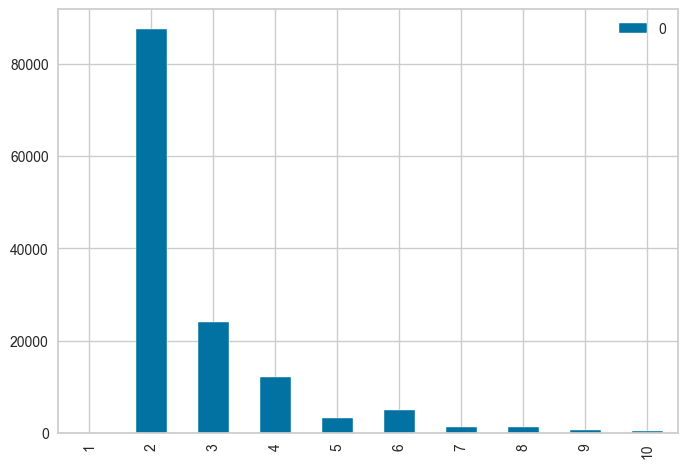

In [90]:
df_diff.plot(kind='bar'); # alttaki grafiğe göre en sert düşüş noktasını görelim

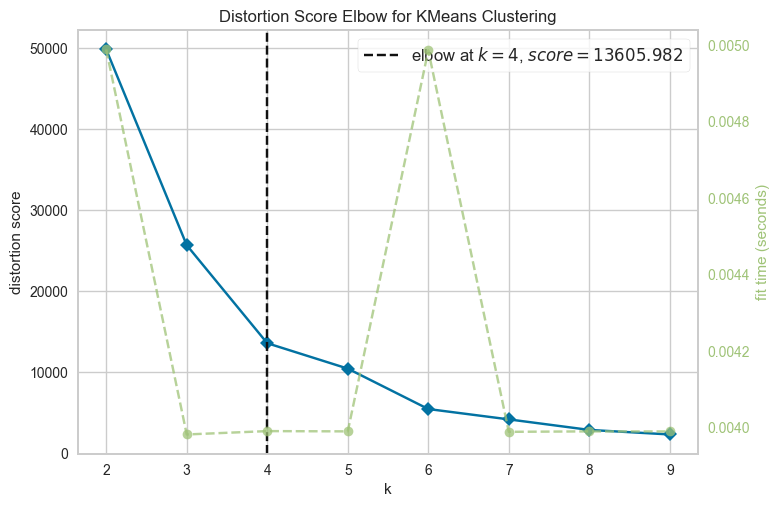

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pandas as pd

# Kategorik sütunları seçme
categorical_columns = X2.select_dtypes("object").columns

# Sayısal sütunları seçme
numerical_columns = X2.select_dtypes(include=['int64', 'float64']).columns

# Kategorik sütunları dönüştürme
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X2[column] = le.fit_transform(X2[column])
    label_encoders[column] = le

# Pipeline oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Sayısal sütunları ölçeklendirme
        ('cat', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), categorical_columns)  # Kategorik sütunları One-Hot Encoding
    ])

# KMeans modelini oluşturma
KMeans_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', KMeans(random_state=42))  # KMeans modeli
])

visualizer = KElbowVisualizer(KMeans_model['classifier'], k=(2, 10))  # algoritmanın 2 ile 10 arasındaki her küme sayısı için modeli değerlendireceği anlamına gelir.

visualizer.fit(X2)  # Veriyi modelin fit metoduna veriyoruz
visualizer.show()  # Elbow yöntemini görselleştiriyoruz


In [93]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5422003614907566
For n_clusters=3, the silhouette score is 0.5164243479594349
For n_clusters=4, the silhouette score is 0.5456454864950173
For n_clusters=5, the silhouette score is 0.5419406785678785
For n_clusters=6, the silhouette score is 0.5846540100792624
For n_clusters=7, the silhouette score is 0.5506637125093026
For n_clusters=8, the silhouette score is 0.5976666704895117


### *iii. Apply K Means*

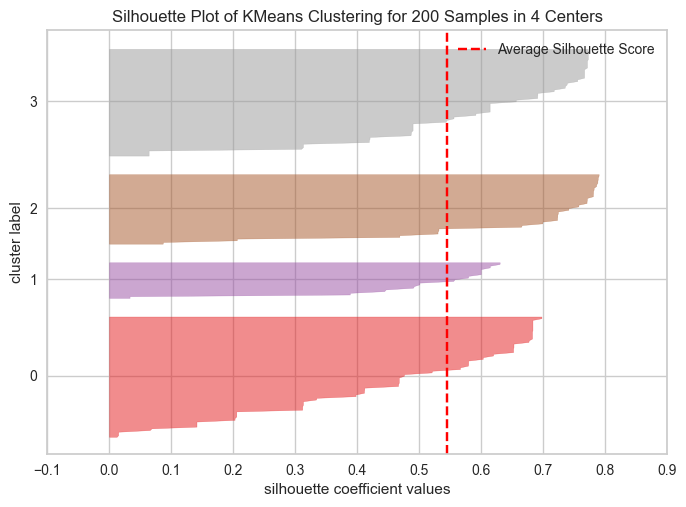

In [94]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

X2_model4 = KMeans(n_clusters=4, random_state=42)  # kmeans = 4 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(X2_model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

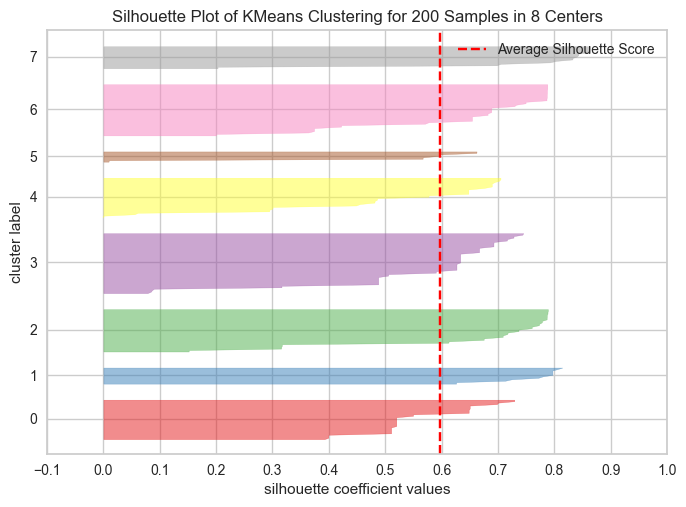

In [96]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

X2_model8 = KMeans(n_clusters=8, random_state=42)  # kmeans = 8 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(X2_model8)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

# Hierarchical Clustering

## ii. *Apply Agglomerative Clustering*

## *i. Determine optimal number of clusters using Dendogram*

In [97]:
from sklearn.cluster import AgglomerativeClustering

## Clustering based on Age and Spending Score- X1

In [102]:
X1.sample(1)

,age,spending score
87,22,55


In [109]:
K= range (2,10)
for k in K:
    model_1 =AgglomerativeClustering(n_clusters = k)
    model_1.fit_predict(X1)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X1, model.labels_)})

f'Silhouette Score for {2} clusters {0.4549465643222241}
f'Silhouette Score for {3} clusters {0.4411791686353356}
f'Silhouette Score for {4} clusters {0.4602496389565028}
f'Silhouette Score for {5} clusters {0.40374071753059787}
f'Silhouette Score for {6} clusters {0.4125958704145705}
f'Silhouette Score for {7} clusters {0.4158977524079244}
f'Silhouette Score for {8} clusters {0.3883688959732531}
f'Silhouette Score for {9} clusters {0.3948151533262091}


In [111]:
model_1 = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters = model_1.fit_predict(X1)


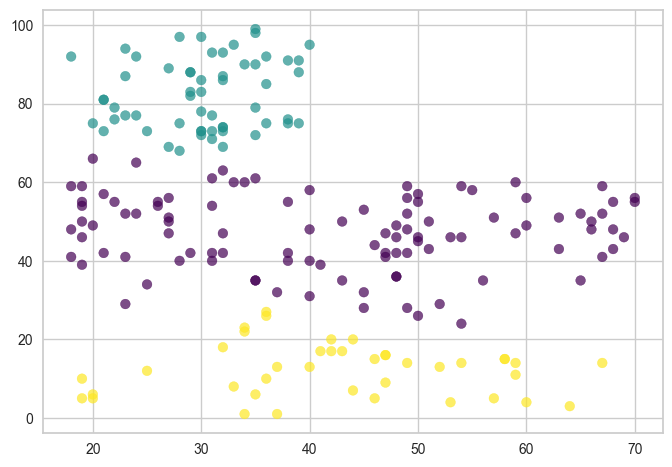

In [113]:
plt.scatter(X1["age"], X1["spending score"], c= model_1.labels_, cmap= "viridis", alpha = 0.7);

## Clustering based on Annual Income and Spending Score- X2

In [116]:
data.sample(1)

,gender,age,annual income,spending score,predicted_clusters,predicted_clusters_2
115,0,19,65,50,2,2


In [117]:
X2 = data[['spending score', 'annual income']]
X2.sample(1)

,spending score,annual income
24,14,28


In [118]:
K= range (2,20)
for k in K:
    model_2 =AgglomerativeClustering(n_clusters = k)
    model_2.fit_predict(X2)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X2, model.labels_)})

f'Silhouette Score for {2} clusters {-0.05773175423423863}
f'Silhouette Score for {3} clusters {-0.05773175423423863}
f'Silhouette Score for {4} clusters {-0.05773175423423863}
f'Silhouette Score for {5} clusters {-0.05773175423423863}
f'Silhouette Score for {6} clusters {-0.05773175423423863}
f'Silhouette Score for {7} clusters {-0.05773175423423863}
f'Silhouette Score for {8} clusters {-0.05773175423423863}
f'Silhouette Score for {9} clusters {-0.05773175423423863}
f'Silhouette Score for {10} clusters {-0.05773175423423863}
f'Silhouette Score for {11} clusters {-0.05773175423423863}
f'Silhouette Score for {12} clusters {-0.05773175423423863}
f'Silhouette Score for {13} clusters {-0.05773175423423863}
f'Silhouette Score for {14} clusters {-0.05773175423423863}
f'Silhouette Score for {15} clusters {-0.05773175423423863}
f'Silhouette Score for {16} clusters {-0.05773175423423863}
f'Silhouette Score for {17} clusters {-0.05773175423423863}
f'Silhouette Score for {18} clusters {-0.0577317

negatif bir siluet skoru, 

belirli bir küme sayısı için veri noktalarının yanlış kümelere atıldığını veya kümeleme algoritmasının veri yapısını iyi yakalayamadığı anlamına gelir

## iii. *Visualizing and Labeling All the Clusters* 

In [120]:
model_2 = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters = model_2.fit_predict(X2)


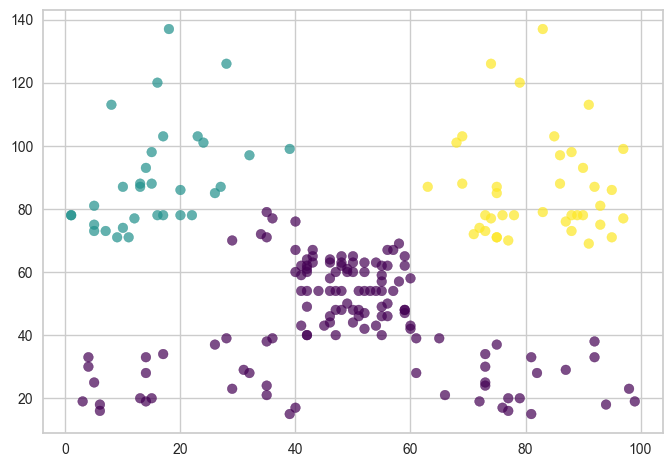

In [122]:
plt.scatter(X2["spending score"], X2["annual income"], c= model_2.labels_, cmap= "viridis", alpha = 0.7);

### Age and Spending Score- X1

### Annual Income and Spending Score- X2

### Interpretation based on Age and Spending Score- X1

In [123]:
X3 = data[["age", 'spending score']]
X3.sample(1)

,age,spending score
16,35,35


In [125]:
K= range (2,30)
for k in K:
    model_3 =AgglomerativeClustering(n_clusters = k)
    model_3.fit_predict(X3)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X3, model.labels_)})

f'Silhouette Score for {2} clusters {0.3948151533262091}
f'Silhouette Score for {3} clusters {0.3948151533262091}
f'Silhouette Score for {4} clusters {0.3948151533262091}
f'Silhouette Score for {5} clusters {0.3948151533262091}
f'Silhouette Score for {6} clusters {0.3948151533262091}
f'Silhouette Score for {7} clusters {0.3948151533262091}
f'Silhouette Score for {8} clusters {0.3948151533262091}
f'Silhouette Score for {9} clusters {0.3948151533262091}
f'Silhouette Score for {10} clusters {0.3948151533262091}
f'Silhouette Score for {11} clusters {0.3948151533262091}
f'Silhouette Score for {12} clusters {0.3948151533262091}
f'Silhouette Score for {13} clusters {0.3948151533262091}
f'Silhouette Score for {14} clusters {0.3948151533262091}
f'Silhouette Score for {15} clusters {0.3948151533262091}
f'Silhouette Score for {16} clusters {0.3948151533262091}
f'Silhouette Score for {17} clusters {0.3948151533262091}
f'Silhouette Score for {18} clusters {0.3948151533262091}
f'Silhouette Score for

veri noktalarının yanlış kümelere atıldığını veya kümeleme algoritmasının veri yapısını iyi yakalayamadığını gösterebilir. 

In [126]:
model_3 = AgglomerativeClustering(n_clusters=3, linkage="ward")
clusters = model_3.fit_predict(X3)


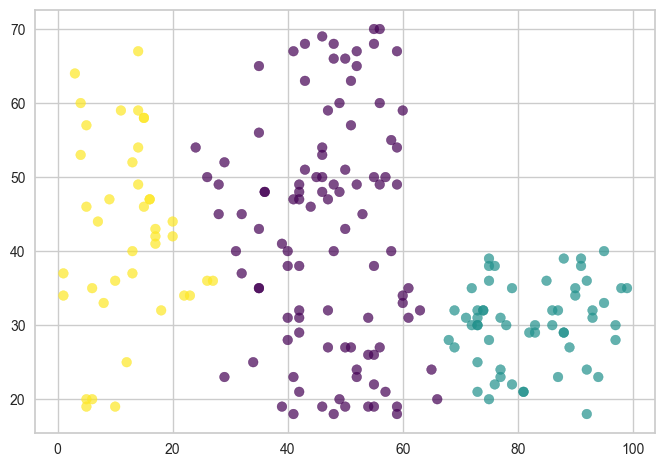

In [129]:
plt.scatter(X3["spending score"], X3["age"], c= model_3.labels_, cmap= "viridis", alpha = 0.7);

# Conclusion

# <p style="background-color:green;font-family:newtimeroman;font-size:130%;color:white;text-align:center;border-radius:20px 20px;"><b>Unsupervised Project </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |